In [1]:
"""

Ilustrating the CMP / Ilustrando o PMC

Author / Autor: imoripaolo

"""

import numpy as np
import matplotlib.pyplot as plt
import math as math

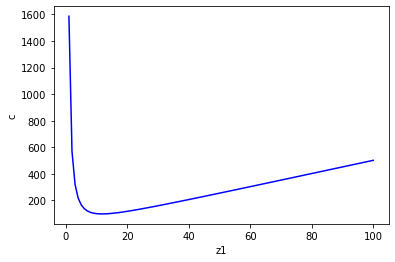

As Demandas Compensadas são z_1(q,w)= 12.0 e z_2(q,w)= 7.607257743127309


In [2]:
"""
The Cost Minimization Problem

min_{z_1,z_2} z_1w_1 + z_2w_2 st f(z_1,z_2) = q

We assume a Cobb-Douglas function:

q = z_1^{alpha_1}z_2^{alpha_2}

Therefore,

z_2 = (q/z_1^{alpha_1})^{1/alpha_2}

Therefore, we can write the CMP as:

min_{z_1} z_1w_1 + (q/z_1^{alpha_1})^{1/alpha_2}w_2

Method: Grid search

-----

O Problema de Minimização de Custos

min_{z_1,z_2} z_1w_1 + z_2w_2 st f(z_1,z_2) = q

Assumimos uma função Cobb-Douglas

q = z_1^{alpha_1}z_2^{alpha_2}

Logo,

z_2 = (q/z_1^{alpha_1})^{1/alpha_2}

Então, podemos escrever o PMC como:

min_{z_1} z_1w_1 + (q/z_1^{alpha_1})^{1/alpha_2}w_2

Método: procura no grid

"""

q, w1, w2 = 10, 5, 5

def cost(x,y):
    c = (x*w1) + (y*w2)
    return c

z1_min, z1_max = 1, 100
z1 = np.linspace(z1_min, z1_max, 100)
 

c = np.zeros(100)
for i in range(0,100):
    c[i] = cost(z1[i],((q**(1/0.4))/(z1[i]**(0.6/0.4))))
    
fig, ax = plt.subplots()
ax.plot(z1, c,'b')
ax.set_ylabel('c')
ax.set_xlabel('z1')
plt.show()

star = np.argmin(c)
print("As Demandas Compensadas são z_1(q,w)=", z1[star], "e z_2(q,w)=", (q/z1[star]**0.6)**(1/0.4) )    

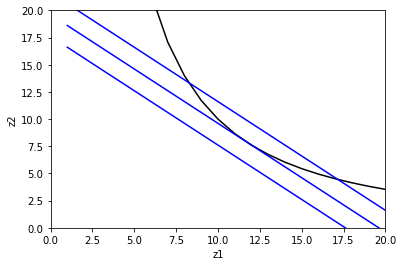

In [3]:
# Now let's check the traditional graph / Agora vamos ver o nosso gráfico tradicional:

def ind(x,q):
    output = (q/(x**0.6))**(1/0.4)
    return output

def min_cost(x,c):
    x2 = (c - x*w1)/w2
    return x2

prod, z21, z22, z23 = np.zeros(100), np.zeros(100), np.zeros(100), np.zeros(100)
for i in range(0,100):
    prod[i]= ind(z1[i],q)
    z21[i] = min_cost(z1[i],c[star])
    z22[i] = min_cost(z1[i],c[star]-10)
    z23[i] = min_cost(z1[i],c[star]+10)
    
fig, ax = plt.subplots()
plt.xlim([0, 20])
plt.ylim([0, 20])
ax.plot(z1,prod,'k')
ax.plot(z1,z21,'b')
ax.plot(z1,z22,'b')
ax.plot(z1,z23,'b')
ax.set_ylabel('z2')
ax.set_xlabel('z1')
plt.show()